Continue using the survey data frame from the package MASS for the
next few exercises. <br>
__a.__ The survey data set has a variable named Exer, a factor with k = 3
levels describing the amount of physical exercise time each
student gets: none, some, or frequent. Obtain a count of the
number of students in each category and produce side-by-side
boxplots of student height split by exercise.

In [14]:
library("MASS")
names(survey)

[1] "Sex"    "Wr.Hnd" "NW.Hnd" "W.Hnd"  "Fold"   "Pulse"  "Clap"   "Exer"  
 [9] "Smoke"  "Height" "M.I"    "Age"

In [15]:
table(survey$Exer)


Freq None Some 
 115   24   98 

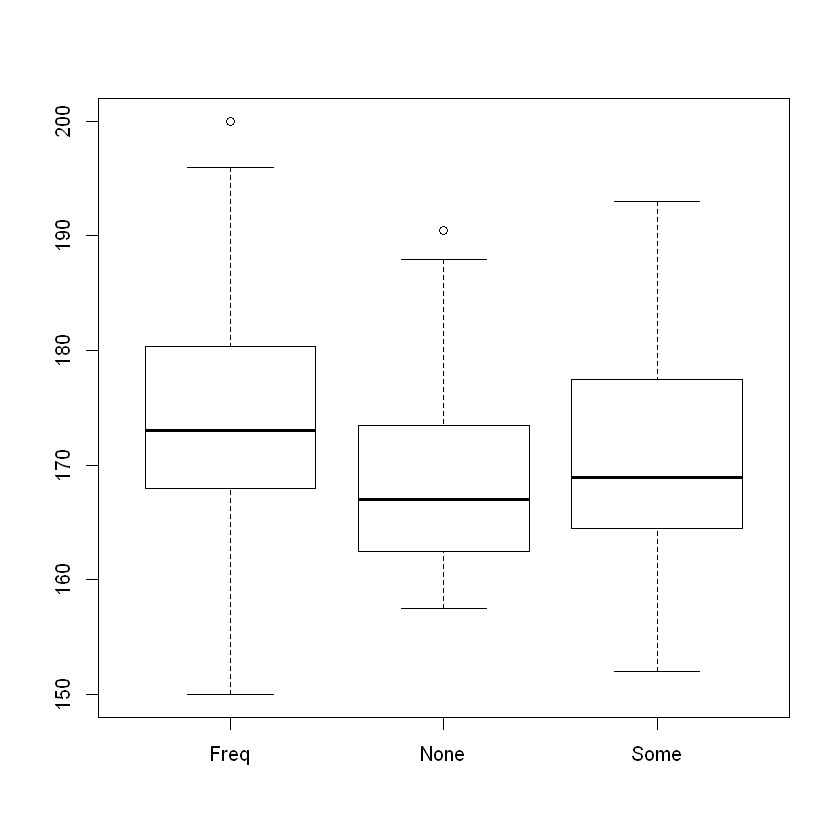

In [16]:
boxplot(Height ~ Exer, data = survey)

__b.__ Assuming independence of the observations and normality as
usual, fit a linear regression model with height as the response
variable and exercise as the explanatory variable (dummy
coding). What’s the default reference level of the predictor?
Produce a model summary.

In [6]:
levels(survey$Exer)

[1] "Freq" "None" "Some"

In [7]:
exer.fit = lm(Height ~ Exer, data = survey)
summary(exer.fit)


Call:
lm(formula = Height ~ Exer, data = survey)

Residuals:
    Min      1Q  Median      3Q     Max 
-24.607  -6.397  -1.607   6.103  25.393 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 174.6067     0.9396 185.836  < 2e-16 ***
ExerNone     -5.5787     2.3489  -2.375  0.01847 *  
ExerSome     -4.2098     1.4094  -2.987  0.00316 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9.628 on 206 degrees of freedom
  (28 observations deleted due to missingness)
Multiple R-squared:  0.05333,	Adjusted R-squared:  0.04414 
F-statistic: 5.802 on 2 and 206 DF,  p-value: 0.003536


In [8]:
one.of.each <- factor(levels(survey$Exer))
one.of.each

[1] Freq None Some
Levels: Freq None Some

In [9]:
predict(exer.fit,newdata=data.frame(Exer=one.of.each), interval="confidence",level=0.95)

,fit,lwr,upr
1,174.6067,172.7543,176.4591
2,169.0280,164.7836,173.2724
3,170.3969,168.3258,172.4680


__c.__ Draw a conclusion based on the fitted model from (b)—does it
appear that exercise frequency has any impact on mean height?
What is the nature of the estimated effect?

Seems to be due to be p-value: 0.003536

__d.__ Predict the mean heights of one individual in each of the three
exercise categories, accompanied by 95 percent prediction
intervals

In [21]:
predict(exer.fit, newdata=data.frame(Exer=one.of.each) , interval = "predict", level = .95 )

,fit,lwr,upr
1,174.6067,155.5349,193.6784
2,169.0280,149.5777,188.4783
3,170.3969,151.3027,189.4911


__e.__ Do you arrive at the same result and interpretation for the
height-by-exercise model if you construct an ANOVA table
using aov?

In [28]:
summary(aov(Height~Exer, data = survey))

             Df Sum Sq Mean Sq F value  Pr(>F)   
Exer          2   1076   537.8   5.802 0.00354 **
Residuals   206  19095    92.7                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
28 observations deleted due to missingness

Yes,  the same result and interpretation for the height-by-exercise model if you construct an ANOVA table using aov

__Now, turn back to the ready-to-use mtcars data set. One of the variables in this data frame is qsec, described as the time in seconds it takes to race a quarter mile; another is gear, the number of forward gears (cars in this data set have either 3, 4, or 5 gears) __

__g.__ Using the vectors straight from the data frame, fit a simple linear
regression model with qsec as the response variable and gear as
the explanatory variable and interpret the model summary.

In [32]:
mtcars[1,]

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21,6,160,110,3.9,2.62,16.46,0,1,4,4



Call:
lm(formula = qsec ~ gear, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.7929 -1.1604 -0.3278  1.2122  5.2122 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  19.7482     1.6239  12.161    4e-13 ***
gear         -0.5151     0.4321  -1.192    0.243    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.775 on 30 degrees of freedom
Multiple R-squared:  0.04523,	Adjusted R-squared:  0.01341 
F-statistic: 1.421 on 1 and 30 DF,  p-value: 0.2425


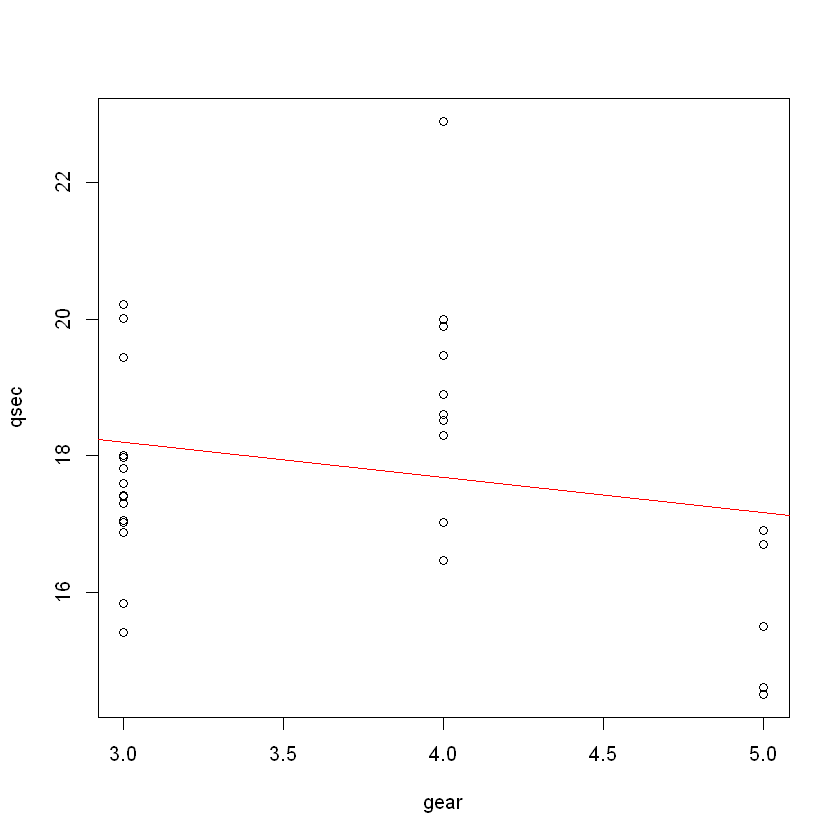

In [37]:
plot(qsec ~ gear, data = mtcars)
carfit <- lm(qsec ~ gear, data = mtcars)
abline(carfit, col = "red")
summary(carfit)

__h.__ Explicitly convert gear to a factor vector and refit the model.
Compare the model summary with that from (g). What do
you find?

In [38]:
carfit <- lm(qsec ~ factor(gear), data = mtcars)
summary(carfit)


Call:
lm(formula = qsec ~ factor(gear), data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.5050 -0.6667 -0.2060  0.6125  3.9350 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    17.6920     0.3691  47.928  < 2e-16 ***
factor(gear)4   1.2730     0.5537   2.299  0.02890 *  
factor(gear)5  -2.0520     0.7383  -2.779  0.00946 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.43 on 29 degrees of freedom
Multiple R-squared:  0.4012,	Adjusted R-squared:  0.3599 
F-statistic: 9.715 on 2 and 29 DF,  p-value: 0.0005897
